# Calc Simple moving average
#### Source: https://www.datacamp.com/community/tutorials/moving-averages-in-pandas

In [1]:
# requirement
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# get stock information of Tesla(TSLA), period = 2 months
tsla = yf.Ticker("TSLA")
hist = tsla.history(period="2mo")

# new df=sma, with column= Close stock value
sma = hist.iloc[:,3:4]  

In [10]:
# 3, 10 days simple moving average (SMA), using close value
sma['sma_3'] = sma['Close'].rolling(window=3).mean()
sma['sma_10'] = sma['Close'].rolling(window=10).mean()

# checker
print('There are :', sma.shape[0], 'datapoints')


There are : 43 datapoints


In [11]:
# Compare sma 3 days vs sma 10 days, by 3 - 10
sma['sma3_10'] = sma['sma_3'] - sma['sma_10']

calc = []
for row in sma['sma3_10']:
    if row > 0: # if 3 > 10, upward trend
        calc.append('1')
    elif row < 0: # if 3 < 10, downward trend
        calc.append('-1')
    elif row is 0: # 3 = 10, no change trend
        calc.append('0')
    else: 
        calc.append('NaN')
sma['updown'] = calc
sma['updown'] = sma.updown.astype(float)

#sma.tail(50)

In [12]:
# sign of buy and sell

sma['cross'] = sma['updown'].diff()
logic = []
for row in sma['cross']:
    if row  < 0:
        logic.append('sell')
    elif row > 0:
        logic.append('buy')
    else:
        logic.append('shower and sleep')
sma['sign'] = logic

sma.tail(50)

,Close,sma_3,sma_10,sma3_10,updown,cross,sign
Date,,,,,,,
2020-04-13,650.95,NaN,NaN,NaN,NaN,NaN,shower and sleep
2020-04-14,709.89,NaN,NaN,NaN,NaN,NaN,shower and sleep
2020-04-15,729.83,696.890000,NaN,NaN,NaN,NaN,shower and sleep
2020-04-16,745.21,728.310000,NaN,NaN,NaN,NaN,shower and sleep
2020-04-17,753.89,742.976667,NaN,NaN,NaN,NaN,shower and sleep
2020-04-20,746.36,748.486667,NaN,NaN,NaN,NaN,shower and sleep
2020-04-21,686.72,728.990000,NaN,NaN,NaN,NaN,shower and sleep
2020-04-22,732.11,721.730000,NaN,NaN,NaN,NaN,shower and sleep
2020-04-23,705.63,708.153333,NaN,NaN,NaN,NaN,shower and sleep


In [36]:
class myfun:
    def buy():
        num_stock = (beforetrade//close)
        aftertrade = (beforetrade - (num_stock*close))
        print('Cost: USD', beforetrade)
        print('Number of stock:',num_stock)
        print('Remaining money after purchase: USD',aftertrade)

    def sell():
        aftertrade = (beforetrade + (num_stock*close))
        print('Remaining money after selling: USD', aftertrade)

In [29]:
trade = sma[['Close','sign']]

for i in trade['sign']:
    if i is 'buy':
        print('this is buying price:', trade['sign'])
    elif i is 'sell':
        print('this is selling price:', trade['sign'])
    else:
        print('this is buying price: shower and sleep')

this is buying price: Date
2020-04-13    shower and sleep
2020-04-14    shower and sleep
2020-04-15    shower and sleep
2020-04-16    shower and sleep
2020-04-17    shower and sleep
2020-04-20    shower and sleep
2020-04-21    shower and sleep
2020-04-22    shower and sleep
2020-04-23    shower and sleep
2020-04-24    shower and sleep
2020-04-27    shower and sleep
2020-04-28    shower and sleep
2020-04-29    shower and sleep
2020-04-30    shower and sleep
2020-05-01    shower and sleep
2020-05-04    shower and sleep
2020-05-05                sell
2020-05-06                 buy
2020-05-07    shower and sleep
2020-05-08    shower and sleep
2020-05-11    shower and sleep
2020-05-12    shower and sleep
2020-05-13    shower and sleep
2020-05-14    shower and sleep
2020-05-15    shower and sleep
2020-05-18    shower and sleep
2020-05-19    shower and sleep
2020-05-20    shower and sleep
2020-05-21    shower and sleep
2020-05-22    shower and sleep
2020-05-26    shower and sleep
2020-05-27  

In [37]:
beforetrade = 20000
close = 10
myfun.buy()


Cost: USD 20000
Number of stock: 2000
Remaining money after purchase: USD 0


In [38]:
beforetrade = 0
num_stock = 2000.0
close_2 = 50

myfun.sell()

Remaining money after selling: USD 20000.0


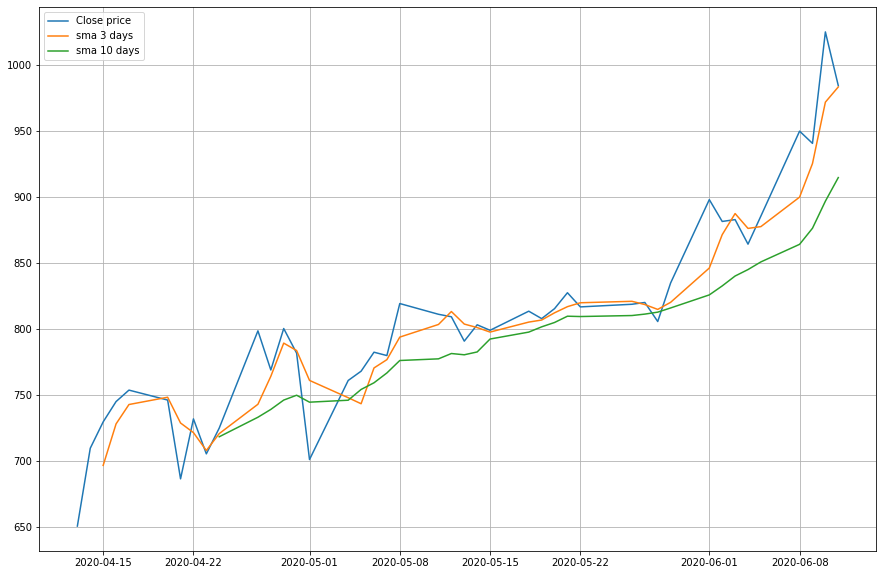

In [39]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(sma['Close'],label='Close price')
plt.plot(sma['sma_3'],label='sma 3 days')
plt.plot(sma['sma_10'],label='sma 10 days')
plt.legend(loc=2)